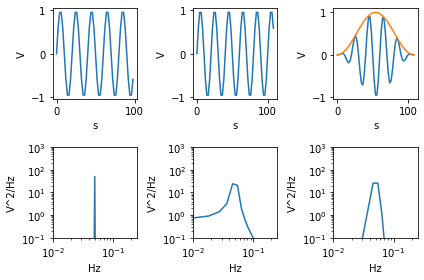

In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

#サンプリング周期・時間長の設定
dt = 2; fn = (1/dt)/2
T1 = 100
N1 = int(T1/dt); t1 = np.arange(0,N1*dt,dt)
f1 = fft.fftshift(fft.fftfreq(N1, d=dt))
T2 = 110
N2 = int(T2/dt); t2 = np.arange(0,N2*dt,dt)
f2 = fft.fftshift(fft.fftfreq(N2, d=dt))
#データ作成・パワースペクトル密度の計算
y1 = np.sin(2*np.pi*0.05*t1)
P1 = 2*np.square(np.absolute(fft.fft(y1))*dt)/T1
P1 = fft.fftshift(P1)
y2 = np.sin(2*np.pi*0.05*t2)
P2 = 2*np.square(np.absolute(fft.fft(y2))*dt)/T2
P2 = fft.fftshift(P2)
w = np.hanning(N2)
y3 = y2*w
P3 = 2*np.square(np.absolute(fft.fft(y3))*dt)/(T2*0.375)
P3 = fft.fftshift(P3)
#時系列・スペクトルをプロット
plt.subplot(2,3,1); plt.plot(t1,y1); plt.xlabel('s'); plt.ylabel('V')
plt.subplot(2,3,2); plt.plot(t2,y2); plt.xlabel('s'), plt.ylabel('V')
plt.subplot(2,3,3); plt.plot(t2,y3,t2,w); plt.xlabel('s'); plt.ylabel('V')
plt.subplot(2,3,4); plt.loglog(f1,P1); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.subplot(2,3,5); plt.loglog(f2,P2); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.subplot(2,3,6); plt.loglog(f2,P3); plt.axis([1e-2,fn,1e-1,1e3])
plt.xlabel('Hz'); plt.ylabel('V^2/Hz')
plt.tight_layout()
